# Forced Vibrations with Viscous Damping

So far we have learned about vibrations from unforced systems single degree of freedom linear systems. In this lesson, we will explore how these systems behave when external forces are applied to the system. Forced vibrations occur in many real systems. For example, any engine that generates rotational motions impose periodic forces to the device. An unblanced washing machine shows how much vibrations can occur.

## Goals

- Write the equations of motion of the system.
- Derive the non-homgeneous solution for the forced system.
- Investigate the steady state solution.

## Prerequisites

- Vector method of representing vibrations
- Unforced undamped vibrations
- Unforced damped vibrations

# The System

![Alt text](mass_spring_damper.svg)

We are going to extend the homogenous mass spring damper system by adding an applied sinusoidal force. The quantities of interest are:

- $x,\dot{x},\ddot{x}$: position, velocity, and acceleration
- $m$: mass
- $c$: viscous damping coefficient
- $k$: spring constant
- $F_0$: amplitude of the applied force
- $\omega$: frequency of the applied force

# Equations of Motion

We first write down Newton's Second Law for this system by examining the free body diagram:

$$\sum F_x = m \ddot{x} = -c \dot{x} -kx + F_0 \operatorname{sin}(\omega t)$$

which provides the second order differential equation in canonical form:

$$m\ddot{x} + c\dot{x} + kx = F_0 \operatorname{sin}(\omega t)$$

We have defined these variables in previous lessons:

- $\omega_n = \sqrt{\frac{k}{m}}$: undamped natural frequency
- $\frac{\omega}{\omega_n}$: frequency ratio
- $c_c= 2m\omega_n$: critical frequency
- $\zeta = \frac{c}{c_c}$: damping ratio
- $w_d = w_n \sqrt{1 - \zeta^2}$: damped natural frequency

The equation of motion can also be written in terms of these quantities:

$$\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = \frac{F_0}{m} \operatorname{sin}(\omega t)$$

# Solution to the differential equation

The equations of motion can be classified as a second order non-homogenous ordinary differential equation. Recall that the solution to a non-homogenous ordinary differential equation is simply the sum of the homogenous solution and a particular solution.

$$x = x_h + x_p$$

# Homogenous Solution

We know from the previous lessons that the solution to

$$\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = 0$$

is

$$x_h = e^{-\omega_n \zeta t}[A \operatorname{sin}(\omega_d t) + B \operatorname{cos}(\omega_d t)]$$

where $A$ and $B$ are determined by the initial conditions. Depending on the value of $\zeta$ the solution describes a over-damped $(\zeta > 1)$, critically damped $(\zeta = 1)$, or under-damped $(\zeta < 1)$ motion.

## Review Question

A damping ratio greater than 1 implies:

1. That the there will be sinusoidal vibrations that decrease over time.
2. That there will be sinusoidal vibrations that increase over time.
3. The decay time constant is large and positive.
4. There are no sinusoidal vibrations.

# Steady State Solution

But with our new prescribed sinusoidal force we are going to impose our will on the system causing the steady state solution to converge to some motion that is the same frequency as our imposed forcing function, instead of the natural frequency of the system.

Because both the first and second derivatives of $x$ in the equations of motion and the forcing function is a sinusoid we can deduce that a possible candidate particular solution would be a sum of sines and cosines at the forced frequency:

$$x_p = C \operatorname{sin}(\omega t) + D \operatorname{cos}(\omega t)$$

By twice differentating $x_p$ and substituting it into the equation of motion one can use the method of undetermined coefficients to find $C$ and $D$. It is important to note that $C$ and $D$ do not depend on the initial conditions, as one would expect from a steady state solution that has no "memory" of the initial state.

# Different view of the steady state solution

The above will give a valid solution but it isn't necessarily easily interpretable. We will use the graphical vector method to find $x_p$ in terms of two more interesting quantities. First, we assume that

$$x_p = x_0 \operatorname{sin}(\omega t - \phi),$$

i.e. a displacment of an unknown magnitude with a phase difference with respect to the applied force. This is equivalent to the sum of sines and cosines and above which can be shown using trigonometric identities.

From a previous lesson we learned that periodic motions can be described by a rotating vectors. We can find expressions for $x_0$ and $\phi$ by finding the sum of the vectors that describe the four forces in the equations of motion.

First the displacement $x_0$ is depicted as an unknown vector in the vertical direction. The force due the spring opposes the displacement and is drawn as a vector in the opposite direction with magnitude $kx_0$. The force due to the damper is $90^\circ$ to the spring force with a magnitude of $\omega c x_0$. The force due to the mass is $90^\circ$ from the damper force and has a magnitude of $\omega^2 m x_0$. Finally, the external force lags the displacement by a phase of $\varphi$.

![Alt text](vector-diagram.svg)

The sum of these forces equate must equate given Newton's second law. If we sum the horizontla nd vertical directions we get:

$$c \omega x_0 - F_0 \operatorname{sin}(\phi)  = 0$$
$$F_0 \operatorname{cos}(\phi) + m \omega^2 x_0 - k x_0 = 0$$

These two equations can be used to solve for $x_0$ and $\phi$. First, by squating both equations and adding them we get:

$$x_0 = \frac{F_0}{\sqrt{(c\omega)^2 + (k - m\omega^2)^2}}
      = \frac{F_0/k}{\sqrt{\left(2 \zeta \frac{\omega}{\omega_n}\right)^2 +
        \left(1 - \frac{\omega^2}{\omega_n^2}\right)^2}}$$

And by solving for sin and cos and dividing the equations:

$$\operatorname{tan}(\phi) = \frac{c\omega}{k - m\omega^2}
                           = \frac{2 \zeta \frac{\omega}{\omega_n}}{1 - \frac{\omega^2}{\omega_n^2}}$$

It is important to note that the steady state solution does not depend on the intial conditions like the homogenous solution does. $x_0$ and $\phi$ have nothing to do with the initial conditions.

These two equations are very important equations in vibrations and provide a great deal of insight. They tell us the amplitude and phase of the steady state displacement of the mass given the amplitude and frequency of the driving force. 

## Exercise

1. If the driven $\omega$ is very small, e.g. it takes a hundred years to displace the mass to its maximum amplitude, what do you expect the amplitude and phase of the resulting steady state displacement to be? 
2. What do you think will happen if you drive the system at its natural frequency?
3. What happens to the amplitude and phase of the system when the frequency is very high?

# Graphical Exploration

Plotting the displacement amplitude and phase as a function of the frequency help give a better picture of what is going on. We'll use some code to explore an interactive plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive
from IPython.display import display
from IPython.core.pylabtools import figsize

%matplotlib inline
figsize(8, 6)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [6]:
F_0 = 1.0
m = 1.0
k = 1.0
omega_n = np.sqrt(m / k)

def F(t, F_0, w):
    return F_0 * np.sin(w * t)

def x_h(t, x_i, x_dot_i):
    pass

def x_p(t, x_0, w, p):
    return x_0 * np.sin(w * t - p)

def amplitude(w, z):
    freq_ratio = w / omega_n
    return F_0 / k / np.sqrt((2 * z * freq_ratio)**2 + (1 - freq_ratio**2)**2)
    
def phase(omega, zeta):
    # Note that arctan2 is needed to get the correct quadrant.
    return np.arctan2(omega * 2.0 * omega_n * zeta, (omega_n**2 - omega))

In [7]:
abscissa = np.linspace(0.0, 3.0, num=1000) # omega / omega_n
time = np.linspace(0.0, 50.0, num=1000)


def plot(zeta=1.0, omega=1.0):
    
    fig, axes = plt.subplots(2, 2)
    
    axes[0, 0].plot(abscissa, amplitude(abscissa * omega_n, zeta) / F_0 / k)
    axes[0, 0].set_xlim((abscissa[0], abscissa[-1]))
    axes[0, 0].set_ylim((0.0, 5.0))
    axes[0, 0].set_xlabel('$\omega / \omega_n$', fontsize=20)
    axes[0, 0].set_ylabel(r'$\frac{x_0}{F_0 /\ k}$', fontsize=20)

    axes[0, 0].axvline(omega, linestyle='--', color='black')
    
    axes[1, 0].plot(abscissa, np.rad2deg(phase(abscissa * omega_n, zeta)))
    axes[1, 0].set_ylim((-10.0, 190.0))
    axes[1, 0].set_xlabel('$\omega / \omega_n$', fontsize=20)
    axes[1, 0].set_ylabel('$\phi$', fontsize=20)
    
    axes[1, 0].axvline(omega, linestyle='--', color='black')
    
    axes[0, 1].plot(time, F(time, F_0, omega))
    axes[0, 1].set_ylim((-5.0, 5.0))
    axes[0, 1].set_xlabel('$t$', fontsize=20)
    axes[0, 1].set_ylabel('$F_0$', fontsize=20)
    
    
    axes[1, 1].plot(time, x_p(time, amplitude(omega, zeta), omega, phase(omega, zeta)))
    axes[1, 1].set_ylim((-5.0, 5.0))
    axes[1, 1].set_xlabel('$t$', fontsize=20)
    axes[1, 1].set_ylabel('$x_p$', fontsize=20)
    
    plt.tight_layout()

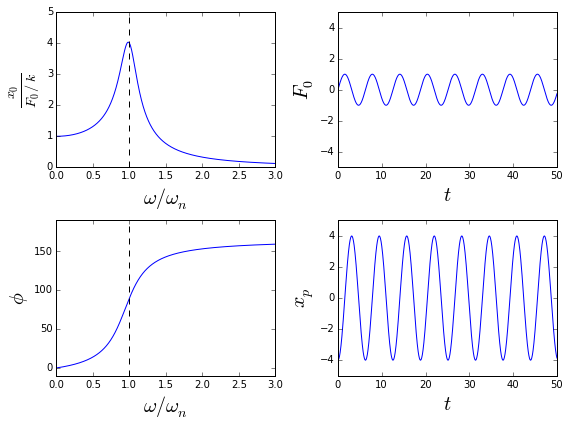

In [8]:
plot(zeta=0.125, omega=1.0)

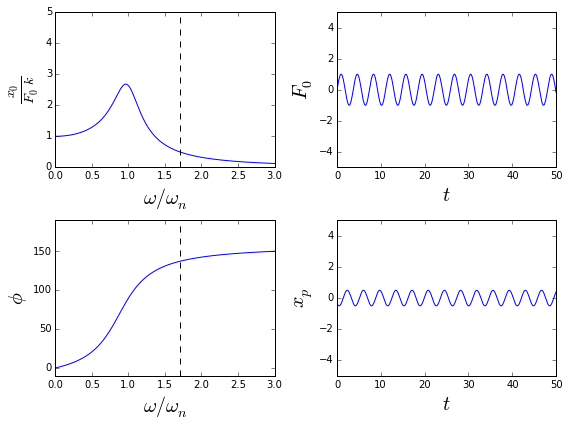

In [5]:
w = interactive(plot, zeta=(0.0, 2.0, 0.01), omega=(0.0, 3.0, 0.1))
display(w)

# Homework

1. Derive the analytic equation for the frequency at which the maximum occurs. 
2. Create a function that computes the maximum amplitude and frequency and use it to add a vertical line to the above plots.
3. Plot the time history of $x = x_h + x_p$.